## Abstract

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook,I would be doing the analysis of what sorts of people were likely to survive. In particular, I would be applying H2O Automl to predict which passengers survived the tragedy and then try to beat the H2O Automl score using Deep Learning model.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
#Load data
df_train = pd.read_csv("titanic\\train.csv")
df_test = pd.read_csv("titanic\\test.csv")

In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Remove Name, Ticket, Cabin, Pclass, Sex, Embarked columns from the data
df_train.drop(['Name', 'Ticket', 'Cabin', 'Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)
df_test.drop(['Name', 'Ticket', 'Cabin', 'Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)

In [14]:
# Replace all missing values in the dataset with 0

df_train.fillna(0)
df_test.fillna(0)

,PassengerId,Age,SibSp,Parch,Fare
0,892,34.5,0,0,7.8292
1,893,47.0,1,0,7.0000
2,894,62.0,0,0,9.6875
3,895,27.0,0,0,8.6625
4,896,22.0,1,1,12.2875
5,897,14.0,0,0,9.2250
6,898,30.0,0,0,7.6292
7,899,26.0,1,1,29.0000
8,900,18.0,0,0,7.2292
9,901,21.0,2,0,24.1500


In [15]:
# Creating dummy variable for all categorical coulmns in the dataset
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [16]:
df_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,0,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,0,35.0,0,0,8.0500


In [17]:
#Start H2O
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.191-b12, mixed mode)


C:\Users\kahma\Anaconda3\lib\site-packages\h2o\backend\server.py:369: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Starting server from C:\Users\kahma\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\kahma\AppData\Local\Temp\tmpc4ut7qte
  JVM stdout: C:\Users\kahma\AppData\Local\Temp\tmpc4ut7qte\h2o_kahma_started_from_python.out
  JVM stderr: C:\Users\kahma\AppData\Local\Temp\tmpc4ut7qte\h2o_kahma_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,2 months and 17 days
H2O cluster name:,H2O_from_python_kahma_1s7pd9
H2O cluster total nodes:,1
H2O cluster free memory:,247.5 Mb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [18]:
#Load data as h2o frames
htrain = h2o.H2OFrame(df_train)
htest = h2o.H2OFrame(df_test)

#Identify predictors and labels
x = htrain.columns
y = 'Survived'
x.remove(y)

htrain[y] = htrain[y].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


## H2O Automl Models

In [19]:
# Run AutoML

aml = H2OAutoML(max_runtime_secs = 1000)
aml.train(x=x, y =y, training_frame=htrain)

#Check the leaderboard
lb = aml.leaderboard

print (lb)

#Prediction
print('Generate predictions…')
test_y = aml.leader.predict(htest)
test_y = test_y.as_data_frame()

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190412_002039,0.749089,0.568744,0.296544,0.437755,0.19163
StackedEnsemble_AllModels_AutoML_20190412_002039,0.744994,0.572194,0.31428,0.439365,0.193042
GBM_grid_1_AutoML_20190412_002039_model_20,0.742586,0.571887,0.317707,0.43962,0.193266
XRT_1_AutoML_20190412_002039,0.735835,0.778688,0.323507,0.449009,0.201609
GBM_4_AutoML_20190412_002039,0.734842,0.585993,0.325951,0.445859,0.198791
GBM_1_AutoML_20190412_002039,0.734605,0.590129,0.319145,0.447363,0.200134
GBM_3_AutoML_20190412_002039,0.731311,0.58946,0.333309,0.447802,0.200527
GBM_2_AutoML_20190412_002039,0.730595,0.588818,0.348337,0.447652,0.200392
DeepLearning_grid_1_AutoML_20190412_002039_model_2,0.729988,0.607293,0.336545,0.449243,0.20182
GBM_grid_1_AutoML_20190412_002039_model_8,0.728488,0.586807,0.335203,0.447731,0.200463



Generate predictions…
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [20]:
# Shutdown H2O session
h2o.cluster().shutdown(prompt=True) 

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? Y
H2O session _sid_9421 closed.


In [21]:
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
df_train.shape

(891, 12)

In [24]:
df_test.shape

(418, 11)

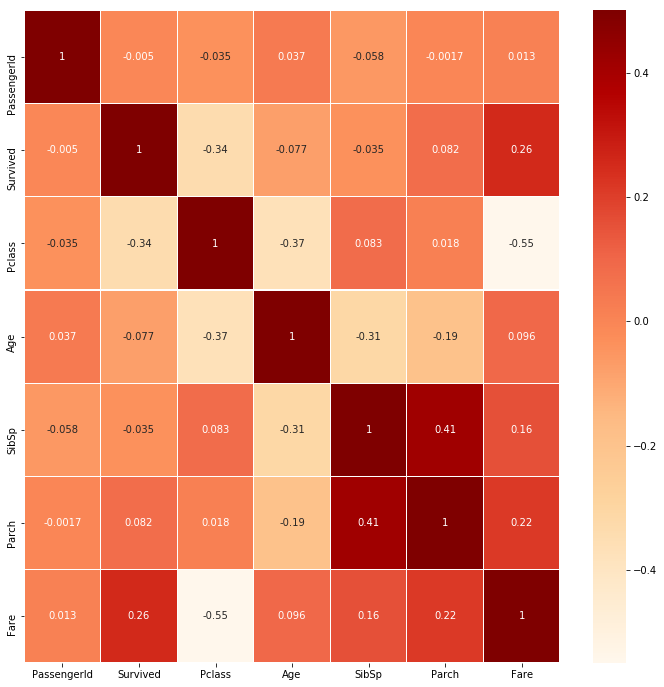

In [26]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_train.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.OrRd, linecolor='white', annot=True)
plt.show()

In [27]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
# Plotting graph to analyse survived vs dead passengers
def bar_chart(feature):
    survived = df_train[df_train['Survived'] == 1][feature].value_counts() 
    dead = df_train[df_train['Survived'] == 0][feature].value_counts() 
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead'] 
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.show()

In [30]:
# Extracting salutation from the name
train_test_data = [df_train, df_test] 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([a-zA-Z]+)(?=\.)', expand=False)

In [31]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Don           1
Sir           1
Lady          1
Jonkheer      1
Capt          1
Ms            1
Mme           1
Name: Title, dtype: int64

In [32]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [33]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                 "Master":3, "Dr":3, "Rev":3, "Major":3, "Col":3, "Mlle":3, "Lady":3,
                 "Mme":3, "Sir":3, "Jonkheer":3, "Ms":3, "Capt":3, "Don":3, "Dona":3,
                "Countess":3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [34]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


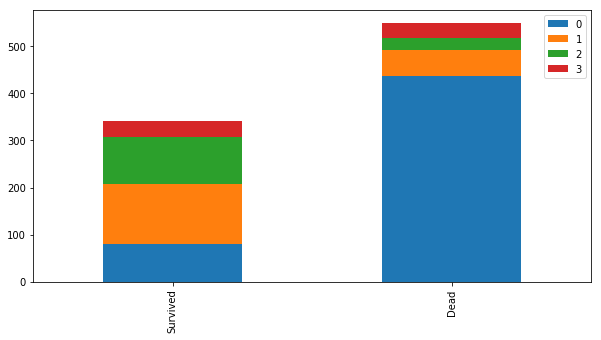

In [35]:
bar_chart('Title')

In [36]:
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

In [37]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [38]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


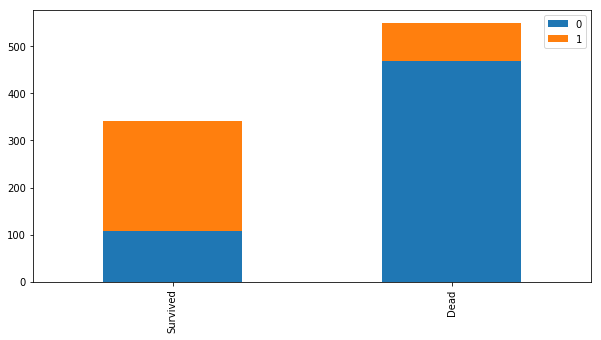

In [39]:
bar_chart('Sex')

In [40]:
# Replace Age with median value of Title 0,1 and 2 respectively
df_train["Age"].fillna(df_train.groupby("Title")["Age"].transform("median"), inplace=True)
df_test["Age"].fillna(df_test.groupby("Title")["Age"].transform("median"), inplace=True)

In [41]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [43]:
# Replace missing values in Embraked column with 'S'(= Southampton)
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [45]:
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [46]:
# Replace Fare with median value of Pclass 1,2 and 3 respectively
df_train["Fare"].fillna(df_train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [47]:
# Segregating Fare into four ranges 
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 2,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 4,
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 6

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,4.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,4.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [49]:
df_train.Cabin.value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
E101               3
C22 C26            3
F33                3
D                  3
F2                 3
E25                2
B77                2
C125               2
B57 B59 B63 B66    2
F4                 2
E67                2
B58 B60            2
C65                2
C52                2
E33                2
B22                2
C2                 2
F G73              2
C123               2
D35                2
D17                2
D26                2
E44                2
D33                2
C83                2
C68                2
E121               2
                  ..
C91                1
A6                 1
C82                1
F G63              1
F38                1
D56                1
C99                1
C106               1
C50                1
A32                1
A36                1
E36                1
E17                1
C30                1
T                  1
C118               1
E31          

In [50]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [51]:
df_train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [52]:
cabin_mapping = {"A":0, "B":0.7, "C":1.4, "D":2.1, "E":2.8, "F":3.5, "G":4.2, "T":4.9}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [53]:
df_train["Cabin"].fillna(df_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
df_test["Cabin"].fillna(df_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [54]:
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,3.50,0,0
1,2,1,1,1,3.0,1,0,PC 17599,4.0,1.40,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,3.50,0,1
3,4,1,1,1,2.0,1,0,113803,4.0,1.40,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,3.50,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,3.50,2,0
6,7,0,1,0,3.0,0,0,17463,4.0,2.80,0,0
7,8,0,3,0,0.0,3,1,349909,2.0,3.50,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,3.50,0,2
9,10,1,2,1,0.0,1,0,237736,4.0,3.15,1,2


In [55]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

In [56]:
family_mapping = {1:0, 2:0.5, 3:1.0, 4:1.5, 5:2.0, 6:2.5, 7:3.0, 8:3.5, 9:4.0, 10:4.5, 11:5.0}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

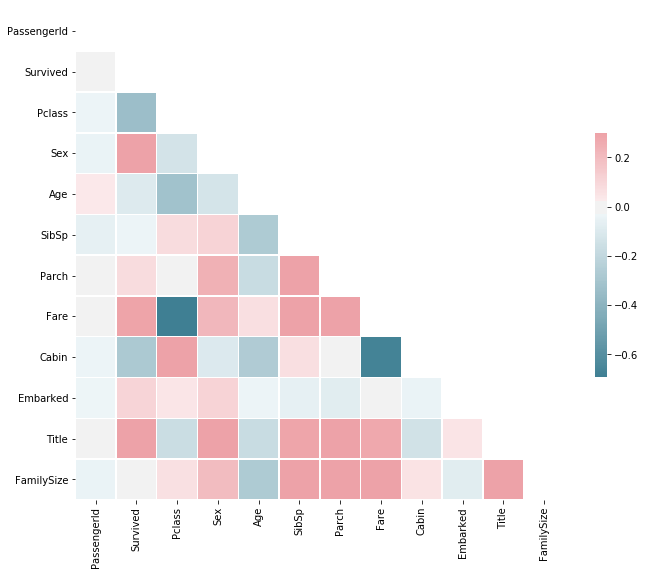

In [57]:
corr = df_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,3.5,0,0,0.5
1,2,1,1,1,3.0,1,0,PC 17599,4.0,1.4,1,2,0.5
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,3.5,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,4.0,1.4,0,2,0.5
4,5,0,3,0,2.0,0,0,373450,0.0,3.5,0,0,0.0


In [59]:
# Removing 'PassengerId', 'Ticket', 'SibSp', 'Parch', 'Cabin' as they don't contribute to our prediction
features_drop = ['PassengerId', 'Ticket', 'SibSp', 'Parch', 'Cabin']
df_train.drop(features_drop, axis=1, inplace=True)
df_test.drop(features_drop, axis=1, inplace=True)

In [60]:
train_data = df_train.drop('Survived', axis=1)
target = df_train['Survived']
train_data.shape, target.shape

((891, 7), (891,))

In [61]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,1.0,0.0,0,0,0.5
1,1,1,3.0,4.0,1,2,0.5
2,3,1,1.0,0.0,0,1,0.0
3,1,1,2.0,4.0,0,2,0.5
4,3,0,2.0,0.0,0,0,0.0
5,3,0,2.0,0.0,2,0,0.0
6,1,0,3.0,4.0,0,0,0.0
7,3,0,0.0,2.0,0,3,2.0
8,3,1,2.0,0.0,0,2,1.0
9,2,1,0.0,4.0,1,2,0.5


In [62]:
df_test.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2,0,0.0
1,3,1,3.0,0.0,0,2,0.5
2,2,0,3.0,0.0,2,0,0.0
3,3,0,2.0,0.0,0,0,0.0
4,3,1,1.0,0.0,0,2,1.0
5,3,0,0.0,0.0,0,0,0.0
6,3,1,2.0,0.0,2,1,0.0
7,2,0,1.0,2.0,0,0,1.0
8,3,1,1.0,0.0,1,2,0.0
9,3,0,1.0,2.0,0,0,1.0


In [177]:
import tensorflow as tf
tf.set_random_seed(777)

train_x = train_data
df = pd.DataFrame(target)
df.columns = ['Survived'] 
train_y = df
test_x = df_test
test_y = pd.read_csv('titanic/gender_submission.csv')
df = pd.DataFrame(test_y['Survived'])
df.columns = ['Survived']
test_y = df

In [178]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((891, 7), (891, 1), (418, 7), (418, 1))

In [179]:
'''INPUT DATA'''
# Here the inputs (X) and targets (Y) have placeholders of dimensions [None, 7] and [None, 1] respectively. 
# We use None because at this time we don’t know how long our sequence will be — it will be determined during the runtime.
X = tf.placeholder(tf.float32, shape=[None, 7])
Y = tf.placeholder(tf.float32, shape=[None, 1])

'''VARIABLES'''
W = tf.get_variable("W", shape=[7, 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([1]), name='bias')
H = tf.sigmoid(tf.matmul(X, W) + b)

'''TRAINING COMPUTATION'''
cost = -tf.reduce_mean(Y*tf.log(H) + (1-Y) * tf.log(1-H))

'''OPTIMIZER'''
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

'''PREDICTIONS'''
predicted = tf.cast(H > 0.5, dtype=tf.float32)
# accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy = tf.contrib.metrics.streaming_auc(predicted, Y)

In [180]:
import time
startTime = time.time()
acc_nn = 0.0
nn_predicted_result = []
feature = train_data.columns.tolist()
Weight = []

with tf.Session() as sess:
    # Only after running tf.global_variables_initializer() in a session will our variables hold the values we tell them to hold when we declare them
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    
    for epoch in range(15001):
        # compute the loss for an epoch, which is usually defined as the average of the loss of batches in that epoch
        cost_val, _ = sess.run([cost, train], feed_dict={X:train_x, Y:train_y})
        if epoch % 1000 == 0:
            print("Cost for the training cycle: ",epoch, "is", cost_val)
                  
    print('-----------------------------')
    print('train_data = ', len(train_x), 'test_data = ', len(test_x))
    Weight = sess.run(W)
    
    for i in range(len(feature)):
        print('W', i, '=', Weight[i], ', feature =', feature[i])

    h, c, y, a = sess.run([H, predicted, Y, accuracy], feed_dict={X:test_x, Y:test_y})
    
acc_nn = a[1]
acc_nn = round(acc_nn * 100, 2)
# Calcualte accuracy
print("accuracy : ", acc_nn)
nn_predicted_result = c
nn_predicted_result = nn_predicted_result.reshape([-1])
nn_predicted_result = nn_predicted_result.astype(int)

endTime = time.time()
print(endTime - startTime, " sec")

Cost for the training cycle:  0 is 1.2656707
Cost for the training cycle:  1000 is 0.4950963
Cost for the training cycle:  2000 is 0.44160303
Cost for the training cycle:  3000 is 0.4276181
Cost for the training cycle:  4000 is 0.4240844
Cost for the training cycle:  5000 is 0.42352027
Cost for the training cycle:  6000 is 0.42337516
Cost for the training cycle:  7000 is 0.42325366
Cost for the training cycle:  8000 is 0.42317185
Cost for the training cycle:  9000 is 0.42313984
Cost for the training cycle:  10000 is 0.42313433
Cost for the training cycle:  11000 is 0.4231341
Cost for the training cycle:  12000 is 0.4231342
Cost for the training cycle:  13000 is 0.42313424
Cost for the training cycle:  14000 is 0.4231342
Cost for the training cycle:  15000 is 0.4231342
-----------------------------
train_data =  891 test_data =  418
W 0 = [-0.85911953] , feature = Pclass
W 1 = [2.1707578] , feature = Sex
W 2 = [-0.48425174] , feature = Age
W 3 = [0.16330612] , feature = Fare
W 4 = [0.18

In [176]:
tf.reset_default_graph() # memory clean

## Contribution Statement

o Used H2O Automl model to Predict survival on the Titanic ship and then tried to beat the accuracy with deep learning model.

o Performed to EDA to analyse the hidden information and find the feature significance.

o Tuned Activation functions, Cost functions, Gradient estimation, number of epochs, Network initialization to improve the model accuracy.

## Summary

In this notebook, the aim was to beat the H2O automl score by some other tool, and in that attempt I have used Deep learning model, that beats the best model generated through H2O Automl by 20% margin.

The key factors in our Deep Learning Model being able to outscore H2O Automl are; the EDA* that has been done before training the model, how the missing values has been dealt with and making sure that there is no collinearity** in our data.

Another important thing that made our Deep Learning Model to score better is what Cost function, Activation function, Gradient estimator, number of epochs and network architecture are used to tune the model.

Deep learning model parameters used:

Activation function: Sigmoid
Optimizer: AdamOptimizer
Number of epochs: 15000
Network Initialization: xavier_initializer

*Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

**In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

## Citations

o https://www.kaggle.com/delayedkarma/titanic-h2o-automl

o https://www.kaggle.com/dimitreoliveira/titanic-deep-learning-aproach-tensorflow

## Licence

MIT License

Copyright (c) 2018 Kamran Ahmad

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.